In [50]:
from typing import List, Callable
import math
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from scipy import stats 

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

torch.Size([200, 100, 1])
torch.Size([200, 100, 1])


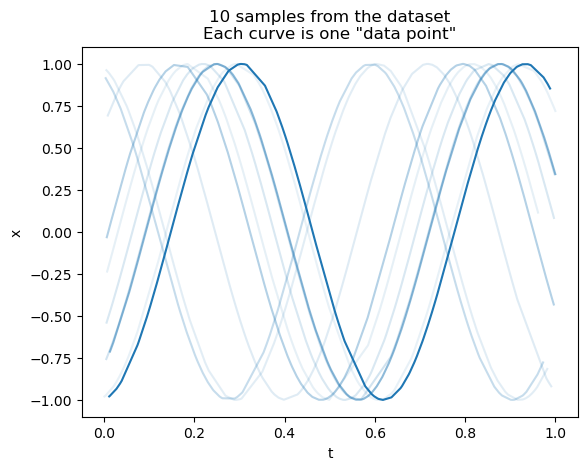

(200, 2)


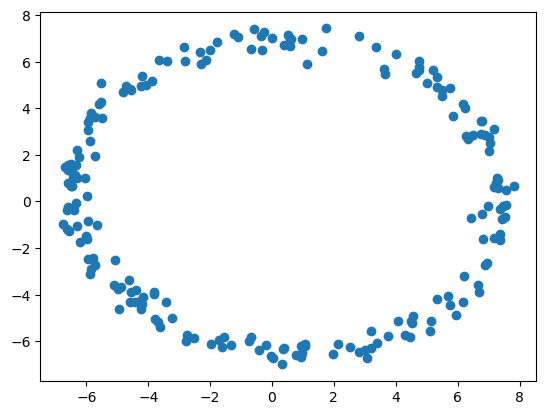

In [54]:
torch.manual_seed(123)

N, T = 200, 100

't是每个序列的时间 都在0-1之间 略有不同'
t = torch.rand(N, T, 1).sort(1)[0].to(device)    # 0-1之间的100个值
print(t.shape)

'这里把一个(100,1)的序列 单变量 看成一个样本 总共200这样的样本 在每个样本上进行加噪'
x = torch.sin(10 * t + 2 * np.pi * torch.rand(N, 1, 1).to(t))
print(x.shape)

for i in range(10):
    plt.plot(t[i,:,0].cpu().numpy(), x[i,:,0].cpu().numpy(), color='C0', alpha=1 / (i + 1))
plt.title('10 samples from the dataset\nEach curve is one "data point"')
plt.xlabel('t')
plt.ylabel('x')
plt.show()


pca = PCA(2)
pca_res = pca.fit_transform(x.cpu().numpy().reshape(200,-1))
print(pca_res.shape)

plt.figure()
plt.scatter(pca_res[:,0],pca_res[:,1])

(200, 100, 1)
(200, 100, 1)
[[-0.        ]
 [-0.97668839]
 [-0.93383861]
 [-0.        ]
 [-0.        ]
 [-0.        ]
 [-0.        ]
 [-0.65068954]
 [-0.        ]
 [-0.48862791]]
-0.0
-0.0


C:\Users\PC123\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\PC123\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  exec(code_obj, self.user_global_ns, self.user_ns)


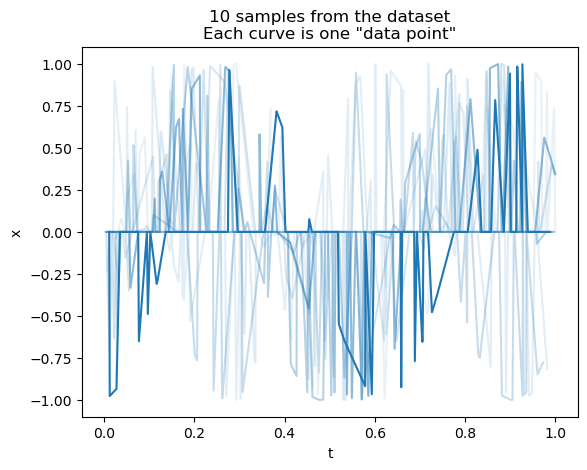

(200, 2)


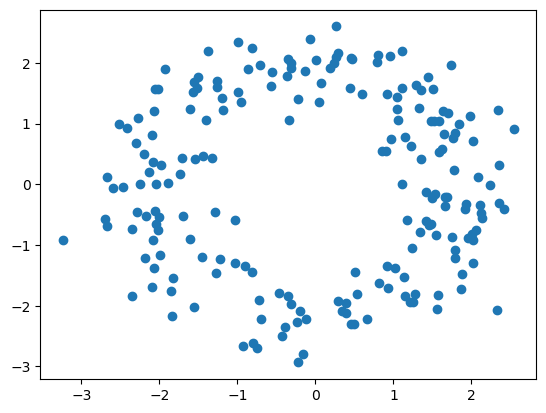

In [68]:
np.random.seed(42)
ratio = 0.7
size = (200, 100, 1)
mask = np.random.choice([0, 1], size=size, p=[ratio, 1-ratio])
print(mask.shape)

x1 = x.cpu().numpy()*mask
print(x1.shape)
print(x1[0][0:10])


Q1 = np.percentile(x1, 25, interpolation = 'midpoint') 
Q3 = np.percentile(x1, 75, interpolation = 'midpoint') 
IQR = Q3 - Q1 
print(IQR)


IQR = stats.iqr(x1, interpolation = 'midpoint') 
print(IQR)


for i in range(10):
    plt.plot(t[i,:,0].cpu().numpy(), x1[i,:,0], color='C0', alpha=1 / (i + 1))
plt.title('10 samples from the dataset\nEach curve is one "data point"')
plt.xlabel('t')
plt.ylabel('x')
plt.show()


pca = PCA(2)
pca_res1 = pca.fit_transform(x1.reshape(200,-1))
print(pca_res.shape)

plt.figure()
plt.scatter(pca_res1[:,0],pca_res1[:,1])

In [67]:
from fancyimpute import SimpleFill
np.random.seed(42)

ratio = 0.7
size = (200, 100, 1)
mask = np.random.choice([np.nan, 1], size=size, p=[ratio, 1-ratio])
print(mask[0][0:10])

x2 = x.cpu().numpy()*mask
print(x2[0][0:10])

x3 = SimpleFill(fill_method='mean').fit_transform(x2.reshape(200,100))
x3 = x3.reshape(200,100,1)
print(x[0][0:10])

Q1 = np.percentile(x3, 25, interpolation = 'midpoint') 
Q3 = np.percentile(x3, 75, interpolation = 'midpoint') 
IQR = Q3 - Q1 
print(IQR)

IQR = stats.iqr(x3, interpolation = 'midpoint') 
print(IQR)

[[nan]
 [ 1.]
 [ 1.]
 [nan]
 [nan]
 [nan]
 [nan]
 [ 1.]
 [nan]
 [ 1.]]
[[        nan]
 [-0.97668839]
 [-0.93383861]
 [        nan]
 [        nan]
 [        nan]
 [        nan]
 [-0.65068954]
 [        nan]
 [-0.48862791]]
tensor([[-0.9791],
        [-0.9767],
        [-0.9338],
        [-0.9031],
        [-0.8866],
        [-0.6745],
        [-0.6621],
        [-0.6507],
        [-0.5059],
        [-0.4886]], device='cuda:0')
0.2155389537776892
0.2155389537776892


C:\Users\PC123\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\PC123\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\PC123\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\PC123\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the m

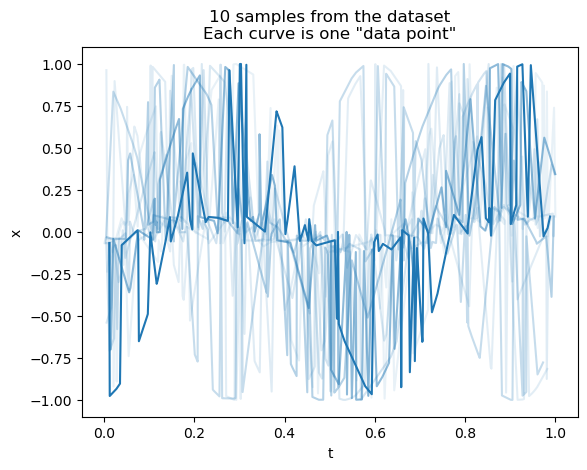

(200, 2)


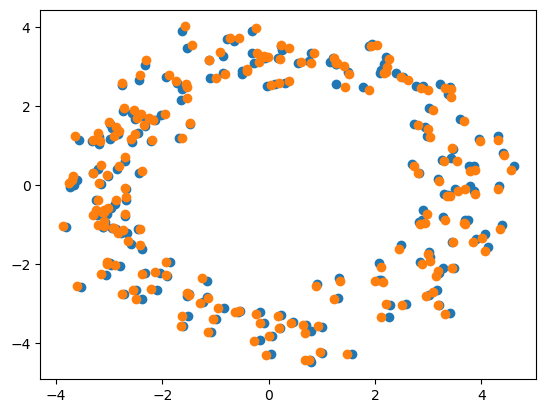

In [43]:
for i in range(10):
    plt.plot(t[i,:,0].cpu().numpy(), x3[i,:,0], color='C0', alpha=1 / (i + 1))
plt.title('10 samples from the dataset\nEach curve is one "data point"')
plt.xlabel('t')
plt.ylabel('x')
plt.show()


pca = PCA(2)
pca_res3 = pca.fit_transform(x3.reshape(200,-1))
print(pca_res.shape)

plt.figure()
plt.scatter(pca_res3[:,0],pca_res3[:,1])
plt.scatter(pca_res1[:,0],pca_res1[:,1])